# Random Forest 

In [13]:
import sys
import numpy as np
import pickle

In [14]:
from sklearn import model_selection

In [15]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [16]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [17]:

import os
import struct
from array import array


class MNIST(object):
    def __init__(self, path='.'):
        self.path = path

        self.test_img_fname = 't10k-images-idx3-ubyte'
        self.test_lbl_fname = 't10k-labels-idx1-ubyte'

        self.train_img_fname = 'train-images-idx3-ubyte'
        self.train_lbl_fname = 'train-labels-idx1-ubyte'

        self.test_images = []
        self.test_labels = []

        self.train_images = []
        self.train_labels = []

    def load_testing(self):
        ims, labels = self.load(os.path.join(self.path, self.test_img_fname),
                                os.path.join(self.path, self.test_lbl_fname))

        self.test_images = ims
        self.test_labels = labels

        return ims, labels

    def load_training(self):
        ims, labels = self.load(os.path.join(self.path, self.train_img_fname),
                                os.path.join(self.path, self.train_lbl_fname))

        self.train_images = ims
        self.train_labels = labels

        return ims, labels

    @classmethod
    def load(cls, path_img, path_lbl):
        with open(path_lbl, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049,'
                                 'got {}'.format(magic))

            labels = array("B", file.read())

        with open(path_img, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051,'
                                 'got {}'.format(magic))

            image_data = array("B", file.read())

        images = []
        for i in range(size):
            images.append([0] * rows * cols)

        for i in range(size):
            images[i][:] = image_data[i * rows * cols:(i + 1) * rows * cols]

        return images, labels


In [18]:
# Random Forest Classifier

old_stdout = sys.stdout
log_file = open("summary.log","w")
sys.stdout = log_file


#Loading MNIST Data
# data = MNIST('./python-mnist/data/')

data = MNIST('./MNIST-Dataset/python-mnist/')

#Loading Training Data
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)
#Loading Testing Data
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)


#Features
X = train_img

#Labels
y = train_labels

#Preparing Classifier Training and Validation Data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1)


#Random Forest Classifier with n_estimators = 100, n_jobs = 10
#Pickling the Classifier for Future Use
clf = RandomForestClassifier(n_estimators=100, n_jobs=10)
clf.fit(X_train,y_train)

with open('MNIST_RFC.pickle','wb') as f:
    pickle.dump(clf, f)

pickle_in = open('MNIST_RFC.pickle','rb')
clf = pickle.load(pickle_in)

#Calculating Accuracy of trained Classifier
confidence = clf.score(X_test,y_test)

#Making Predictions on Validation Data
y_pred = clf.predict(X_test)

#Calculating Accuracy of Predictions
accuracy = accuracy_score(y_test, y_pred)

#Creating Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)



In [19]:
# RFC Trained Classifier Confidence:


In [20]:
confidence

0.96899999999999997

In [21]:
# Predicted Values: 

In [22]:
y_pred

array([2, 8, 2, ..., 5, 2, 1])

In [23]:
# Accuracy of Classifier on Validation Image Data:

In [24]:
accuracy

0.96899999999999997

In [25]:
#Confusion Matrix:

In [26]:
conf_mat

array([[576,   0,   1,   1,   0,   0,   1,   0,   3,   1],
       [  0, 728,   3,   2,   1,   1,   1,   2,   0,   0],
       [  4,   2, 571,   1,   2,   0,   0,   3,   4,   3],
       [  0,   1,   7, 592,   0,   5,   0,   7,   4,   1],
       [  2,   2,   1,   0, 559,   0,   1,   2,   0,  10],
       [  1,   0,   1,   7,   1, 512,   5,   0,   2,   2],
       [  2,   0,   1,   0,   0,   6, 618,   0,   2,   0],
       [  2,   1,   6,   1,   3,   0,   0, 551,   1,   9],
       [  0,   3,   4,   1,   6,   0,   2,   2, 560,   7],
       [  0,   0,   1,   9,   4,   3,   0,   4,   8, 547]])

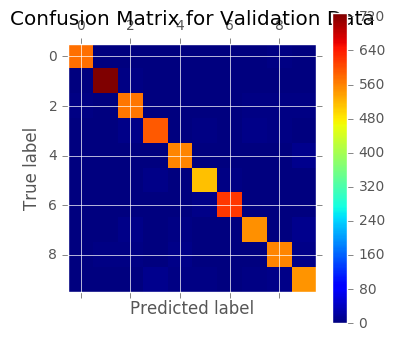

In [27]:

# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


#Making Predictions on Test Input Images
test_labels_pred = clf.predict(test_img)

#Calculating Accuracy of Trained Classifier on Test Data
acc = accuracy_score(test_labels,test_labels_pred)

# Creating Confusion Matrix for Test Data
conf_mat_test = confusion_matrix(test_labels,test_labels_pred)



In [28]:
#Predicted Labels for Test Images: 

In [29]:
test_labels_pred

array([7, 2, 1, ..., 4, 5, 6])

In [30]:
#Accuracy of Classifier on Test Images

In [31]:
acc

0.96860000000000002

In [32]:
#Confusion Matrix for Test Data:

In [33]:
conf_mat_test

array([[ 971,    0,    1,    0,    0,    3,    1,    1,    2,    1],
       [   0, 1123,    3,    3,    0,    1,    3,    1,    1,    0],
       [   6,    0,  999,    7,    2,    0,    3,    9,    6,    0],
       [   0,    0,    9,  972,    0,    7,    0,   10,    9,    3],
       [   2,    0,    1,    0,  954,    0,    5,    0,    3,   17],
       [   3,    0,    1,   17,    4,  854,    3,    2,    6,    2],
       [   5,    3,    0,    0,    2,    5,  940,    0,    3,    0],
       [   2,    6,   18,    0,    2,    0,    0,  988,    4,    8],
       [   2,    0,    6,   12,    3,    4,    5,    3,  927,   12],
       [   6,    6,    0,   10,   13,    4,    1,    4,    7,  958]])

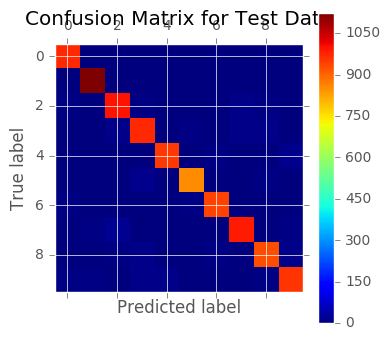

In [34]:

# Plot Confusion Matrix for Test Data
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

sys.stdout = old_stdout
log_file.close()



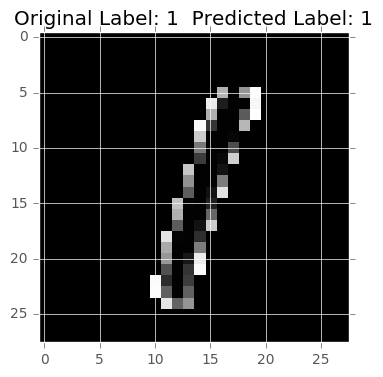

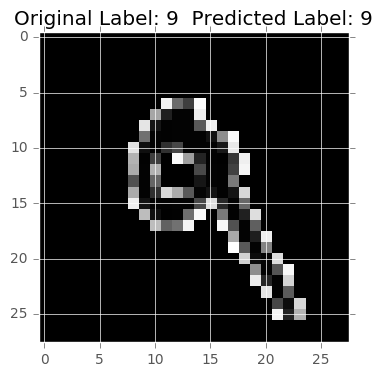

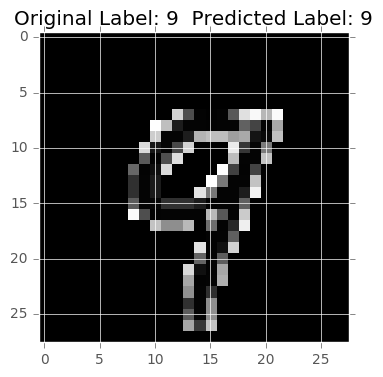

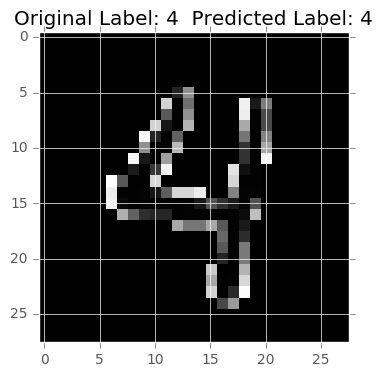

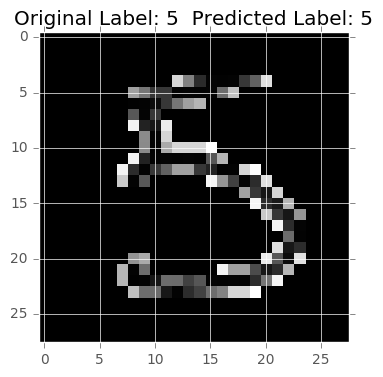

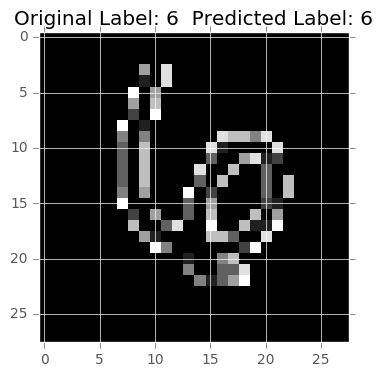

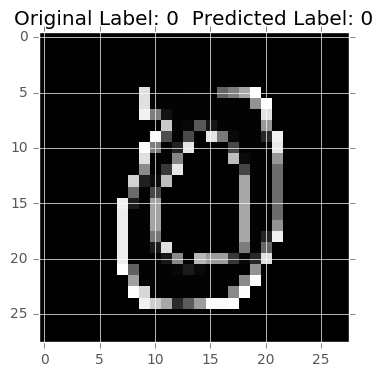

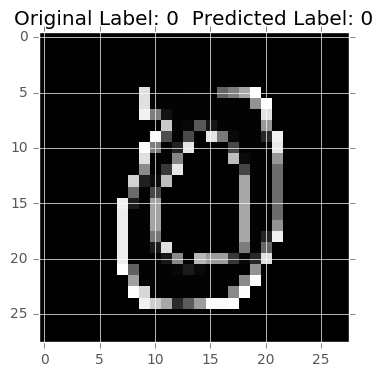

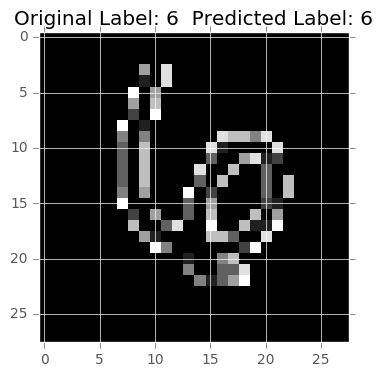

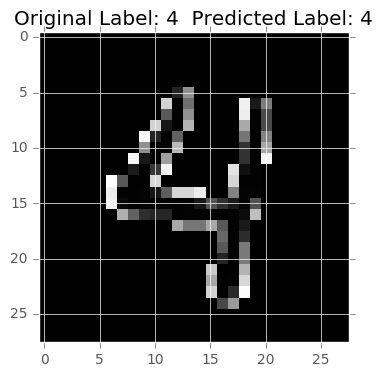

In [35]:

# Show the Test Images with Original and Predicted Labels
a = np.random.randint(1,30,10)
for i in a:
    two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],test_labels_pred[i]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()